# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.848212  2.384900  0.379573  1.048381 -0.845070  2.537837 -4.542983   
1  2.071805 -0.477943 -1.444444 -0.548657  0.010036 -0.582242 -0.042878   
2 -2.985294 -2.747472  1.194068 -0.003036 -1.151041 -0.263559  0.553500   
3 -1.479452  1.542874  0.290895  0.838142 -0.529290 -0.717661  0.484516   
4 -0.281976 -0.309699 -2.162299 -0.851514  0.106167 -1.483888  1.930994   

          V8        V9       V10  ...       V20       V21       V22       V23  \
0 -10.201458 -1.504967 -2.234167  ...  2.585817 -5.291690  0.859364  0.423231   
1  -0.247160  1.171923 -0.342382  ... -0.077306  0.042858  0.390125  0.041569   
2   0.635600  0.438545 -1.806488  ...  1.345776  0.373760 -0.385777  1.197596   
3   0.545092 -0.780767  0.324804  ...  0.038397  0.116771  0.405560 -0.116453   
4  -0.843049 -1.249272  1.079608  ... -0.875516 -0.004199  1.015108 -0.026748   

        V24       V25       V26       V27       V28  Class  
0 -0.506985  1.020052 -0.627751 -0.017753  0.280982      0  
1  0.598427  0.098803  0.979686 -0.093244 -0.065615      0  
2  0.407229  0.008013  0.762362 -0.299024 -0.303929      0  
3  0.541275 -0.216665 -0.415578  0.027126 -0.150347      0  
4  0.077115 -1.468822  0.751700  0.496732  0.331001      0  

[5 rows x 29 columns]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(credit.iloc[:,:28])) ## X 데이터 스케일링

data['Class'] = pd.Series(credit['Class'], dtype='category') ## y 데이터
data.head()

0         1         2         3         4         5         6  \
0 -0.902180  1.442462  0.242076  0.682170 -0.545636  1.897453 -3.087657   
1  1.027442 -0.328926 -0.795394 -0.395393  0.029429 -0.432294  0.005620   
2 -1.461907 -1.733201  0.705348 -0.027248 -0.751404 -0.194335  0.415558   
3 -0.720659  0.921458  0.191638  0.540317 -0.333272 -0.533410  0.368140   
4 -0.131203 -0.224824 -1.203698 -0.599739  0.094078 -1.105548  1.362418   

          7         8         9  ...        19        20        21        22  \
0 -7.481774 -1.310739 -1.750813  ...  3.586292 -6.258702  1.163043  0.721013   
1 -0.185605  1.049741 -0.240491  ... -0.110982  0.038445  0.528470  0.078108   
2  0.461429  0.403048 -1.409372  ...  1.864714  0.429058 -0.520817  2.025422   
3  0.395090 -0.672139  0.292162  ...  0.049651  0.125696  0.549344 -0.188079   
4 -0.622372 -1.085267  0.894765  ... -1.219154 -0.017103  1.373663 -0.036971   

         23        24        25        26        27  Class  
0 -0.838813  1.973207 -1.295843 -0.047097  0.941755      0  
1  0.993348  0.194594  2.026379 -0.237219 -0.226298      0  
2  0.676446  0.019311  1.577217 -0.755467 -1.029430      0  
3  0.898622 -0.414465 -0.857327  0.065929 -0.511850      0  
4  0.129301 -2.831946  1.555181  1.248615  1.110322      0  

[5 rows x 29 columns]

In [5]:
data.Class.value_counts()

0    28432
1      246
Name: Class, dtype: int64

## 1. Logistic Regression 

Modeling

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = X = data.drop(["Class"], axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.predict_proba(X_test)

array([[9.99162657e-01, 8.37342733e-04],
       [9.99687212e-01, 3.12787618e-04],
       [9.79470309e-01, 2.05296911e-02],
       ...,
       [9.99915594e-01, 8.44058313e-05],
       [9.96014554e-01, 3.98544568e-03],
       [9.99193219e-01, 8.06781183e-04]])

In [7]:
classifier.score(X_test, y_test)

0.997907949790795

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [8]:
from sklearn import metrics

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.997907949790795

In [10]:
metrics.f1_score(y_test, y_pred)

0.845360824742268

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [12]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).flatten()
(tn, fp, fn, tp)

(7114, 4, 11, 41)

In [13]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


In [14]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(fp+tn)
f1_score = 2*precision*recall/(precision+recall)

In [15]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40488901e-04,
        1.40488901e-04, 2.80977803e-04, 2.80977803e-04, 5.61955606e-04,
        5.61955606e-04, 7.02444507e-04, 7.02444507e-04, 1.12391121e-03,
        1.12391121e-03, 1.54537792e-03, 1.54537792e-03, 6.18151166e-03,
        6.46248946e-03, 1.84040461e-02, 1.84040461e-02, 3.07670694e-02,
        3.07670694e-02, 2.74936780e-01, 2.75217758e-01, 2.77325091e-01,
        2.77606069e-01, 3.19190784e-01, 3.19612251e-01, 3.67518966e-01,
        3.67799944e-01, 5.27395336e-01, 5.27676314e-01, 5.69963473e-01,
        5.70384940e-01, 6.92048328e-01, 6.92329306e-01, 6.99634729e-01,
        6.99915707e-01, 8.48271987e-01, 8.48552964e-01, 9.03062658e-01,
        9.03343636e-01, 9.91851644e-01, 9.92132622e-01, 1.00000000e+00]),
 array([0.        , 0.01923077, 0.53846154, 0.53846154, 0.55769231,
        0.55769231, 0.75      , 0.75      , 0.82692308, 0.82692308,
        0.86538462, 0.86538462, 0.90384615, 0.90384615, 0.96153846,
  

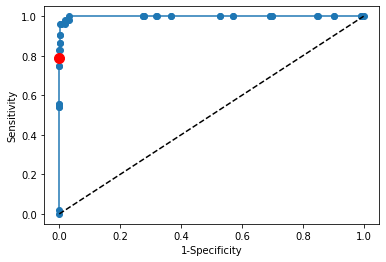

In [36]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-') 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [37]:
# roc curve 아래의 면적 
auc = metrics.auc(fpr, tpr)
auc

0.9987950374997298

## 3. 새로운 cutoff value로 모델 예측하기 

In [45]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]

In [46]:
optimal_threshold ## 새로운 cutoff value

0.009932751970760269

In [47]:
predict_new = np.where(classifier.predict_proba(X_test)[:,1]>optimal_threshold,1,0)
predict_new

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
# 새로운 cutoff value로 분류한 confusion matrix 
metrics.confusion_matrix(y_test, predict_new)

array([[6899,  219],
       [   1,   51]], dtype=int64)

In [49]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predict_new).flatten()
(tn, fp, fn, tp)

(6899, 219, 1, 51)

In [50]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.9693165969316597


In [51]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(fp+tn)
f1_score = 2*precision*recall/(precision+recall)

In [52]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.18888888888888888
recall:  0.9807692307692307
specificity:  0.9692329305984827
f1_score:  0.3167701863354037


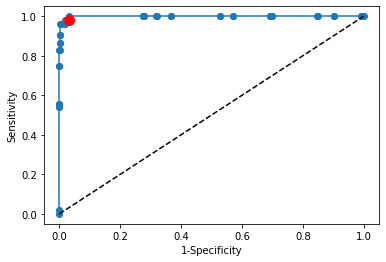

In [53]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 
이전의 cutoff value에 비해 TP의 비중이 높아졌다. confusion matrix의 imbalnace가 개선되었다고 볼 수 있다.